In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('vgsales.csv')
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2394,1613,Frogger: The Great Quest,PS2,2001,Platform,Konami Digital Entertainment,0.60,0.47,0.00,0.16,1.23
1516,9964,Lunar 2: Eternal Blue,SAT,1998,Role-Playing,Kadokawa Shoten,0.00,0.00,0.12,0.00,0.12
9177,10064,My SAT Coach with The Princeton Review,DS,2008,Misc,Ubisoft,0.10,0.00,0.00,0.01,0.11
2441,3327,Spider-Man: Mysterio's Menace,GBA,2001,Action,Activision,0.43,0.16,0.00,0.01,0.61
13677,2268,MLB 12: The Show,PS3,2012,Sports,Sony Computer Entertainment,0.86,0.00,0.00,0.06,0.92
7877,11071,"Saiyuuki: Kinkaku, Ginkaku no Inbou",DS,2007,Role-Playing,D3Publisher,0.00,0.00,0.09,0.00,0.09
1347,2657,NBA ShootOut 98,PS,1998,Sports,Sony Computer Entertainment,0.43,0.29,0.00,0.05,0.78
9028,8349,Disney TH!NK Fast: The Ultimate Trivia Showdown,PS2,2008,Misc,Disney Interactive Studios,0.08,0.06,0.00,0.02,0.17
9751,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
35,4786,Mouse Trap,2600,1981,Action,Coleco,0.38,0.02,0.00,0.00,0.40


# EDA

## Basic Cleansing

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [139]:
#check missing value
df.isna().sum() * 100 / len(df)

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.000000
Genre           0.000000
Publisher       0.220534
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [140]:
#drop missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16288 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16288 non-null  int64  
 1   Name          16288 non-null  object 
 2   Platform      16288 non-null  object 
 3   Year          16288 non-null  int64  
 4   Genre         16288 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16288 non-null  float64
 7   EU_Sales      16288 non-null  float64
 8   JP_Sales      16288 non-null  float64
 9   Other_Sales   16288 non-null  float64
 10  Global_Sales  16288 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [141]:
#check duplicate
df.duplicated().sum()

0

In [142]:
#Data understanding
num = ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
cat = ['Name', 'Platform', 'Genre', 'Publisher']

In [143]:
df[num].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000
mean,8288.826805,2006.403364,0.265696,0.147758,0.078845,0.048435,0.541007
std,4792.026255,5.830172,0.822500,0.509346,0.311907,0.190099,1.567473
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4131.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8290.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [144]:
df[cat].describe()

,Name,Platform,Genre,Publisher
count,16288,16288,16288,16288
unique,11323,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3250,1339


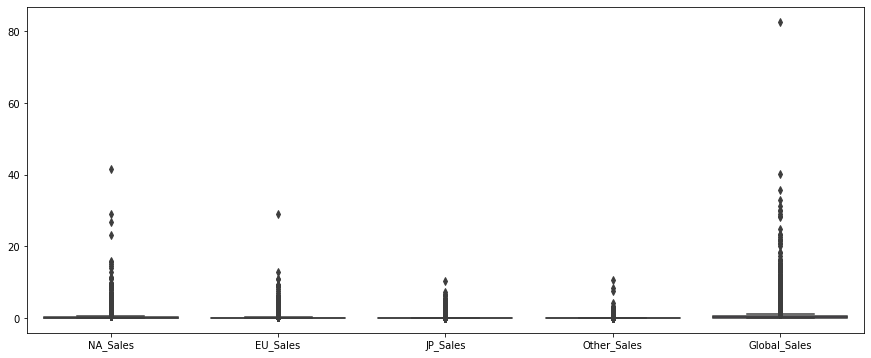

In [145]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.show()

Eda
 1. Top 10 game publisher ?
 2. top 10 global publisher revenue ?
 3. tren global game ? 
 4. top game genre every year
 5. game chart sales every  region

In [146]:
# 1. Answer
top_publisher = df.groupby('Publisher').agg(publ_po = ('Publisher', 'count')).reset_index().sort_values('publ_po', ascending = False).head(10)
top_publisher

,Publisher,publ_po
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
487,THQ,712
359,Nintendo,696
455,Sony Computer Entertainment,682
445,Sega,630
493,Take-Two Interactive,412


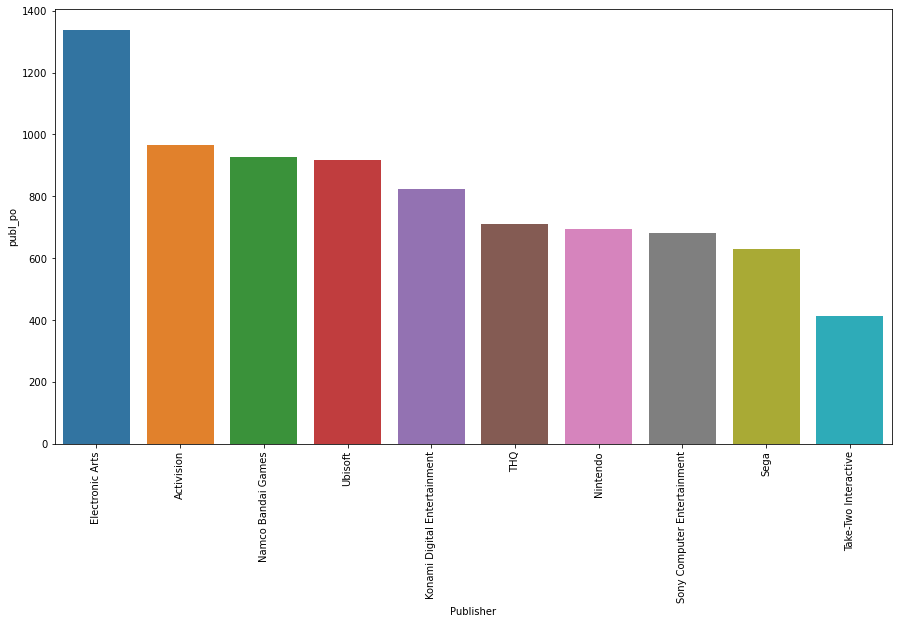

In [147]:
plt.figure(figsize=(15,8))
sns.barplot(data = top_publisher, x = 'Publisher', y ='publ_po')
plt.xticks(rotation=90)
plt.show()

In [148]:
# 2. Answer 
pub_globasales = df.groupby('Publisher').agg(global_sale = ('Global_Sales', 'sum')).reset_index().sort_values('global_sale', ascending = False).head(10)
pub_globasales

,Publisher,global_sale
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54
493,Take-Two Interactive,399.30
487,THQ,340.44
275,Konami Digital Entertainment,278.56
445,Sega,270.66
347,Namco Bandai Games,253.65


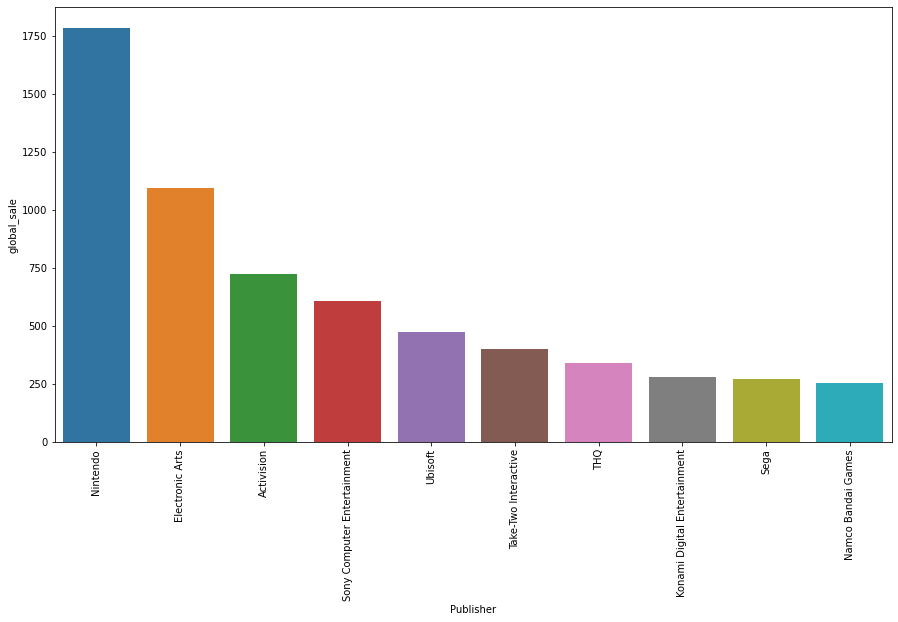

In [149]:
plt.figure(figsize=(15,8))
sns.barplot(data = pub_globasales, x = 'Publisher', y ='global_sale')
plt.xticks(rotation=90)
plt.show()

In [150]:
# 3. Answer
year_data = df.groupby('Year').agg(global_sale = ('Global_Sales', 'sum')).reset_index()
year_data

,Year,global_sale
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


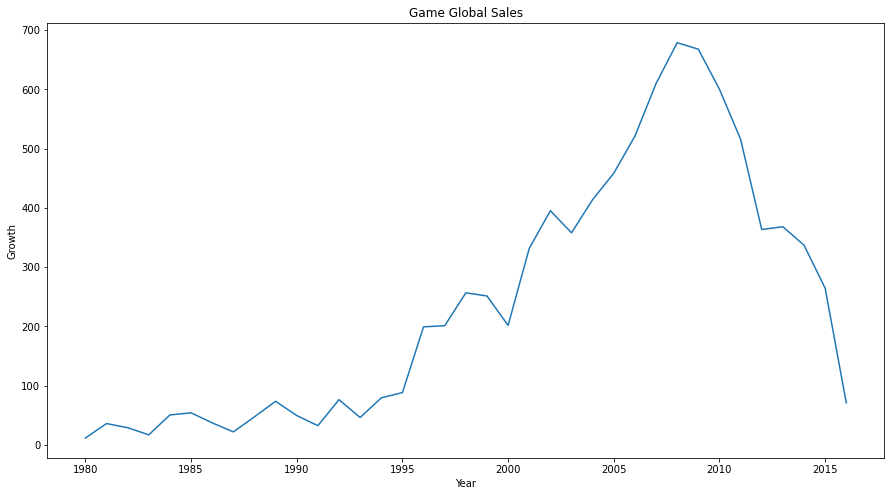

In [151]:
plt.figure(figsize=(15,8))
sns.lineplot(data= year_data, x ='Year', y ='global_sale')
plt.title('Game Global Sales')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.show()

In [152]:
# 4. Asnwer
best_genre = df.groupby(['Year'])['Genre'].agg(pd.Series.mode).reset_index()
best_genre   

,Year,Genre
0,1980,Misc
1,1981,Action
2,1982,Action
3,1983,Action
4,1984,"[Puzzle, Racing, Shooter]"
5,1985,"[Platform, Puzzle]"
6,1986,"[Action, Platform]"
7,1987,Sports
8,1988,Platform
9,1989,Puzzle


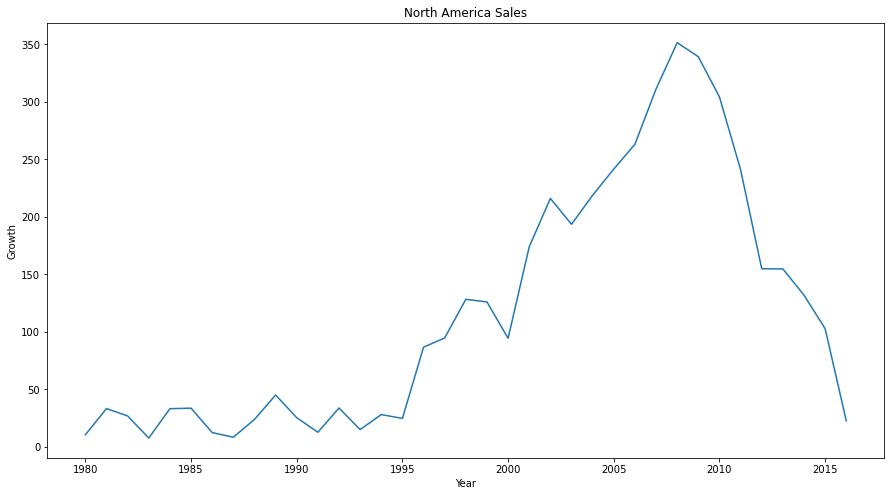

In [153]:
# 5. Na sales chart
NA_sales = df.groupby('Year').agg(year_sales = ('NA_Sales', 'sum')).reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(data = NA_sales, x = 'Year', y='year_sales')
plt.title('North America Sales')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.show()

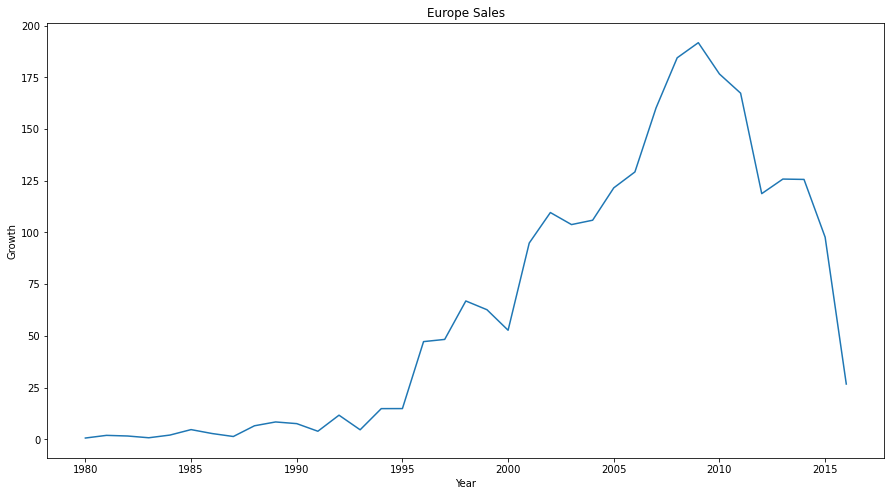

In [154]:
# 5. EU sales chart
EU_sales = df.groupby('Year').agg(year_sales = ('EU_Sales', 'sum')).reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(data = EU_sales, x = 'Year', y='year_sales')
plt.title('Europe Sales')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.show()

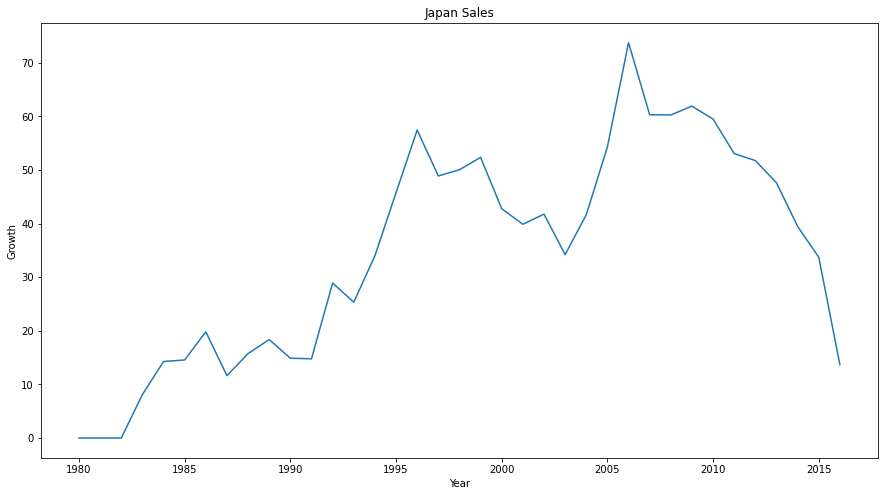

In [155]:
# 5. JP sales chart
JP_sales = df.groupby('Year').agg(year_sales = ('JP_Sales', 'sum')).reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(data = JP_sales, x = 'Year', y='year_sales')
plt.title('Japan Sales')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.show()

## Data Cleaning

## Fiture Selection

In [156]:
fitur_sec = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
df_new = df[fitur_sec]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16288 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16288 non-null  int64  
 1   Name          16288 non-null  object 
 2   Platform      16288 non-null  object 
 3   Year          16288 non-null  int64  
 4   Genre         16288 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16288 non-null  float64
 7   EU_Sales      16288 non-null  float64
 8   JP_Sales      16288 non-null  float64
 9   Other_Sales   16288 non-null  float64
 10  Global_Sales  16288 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.0+ MB


In [157]:
#handle outlier
fil_ent = np.array([True] * len(df_new))
for i in fitur_sec:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df[i] >= low_limit) & (df[i] <= high_limit)) & fil_ent

df_new = df[fil_ent].reset_index()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11879 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         11879 non-null  int64  
 1   Rank          11879 non-null  int64  
 2   Name          11879 non-null  object 
 3   Platform      11879 non-null  object 
 4   Year          11879 non-null  int64  
 5   Genre         11879 non-null  object 
 6   Publisher     11879 non-null  object 
 7   NA_Sales      11879 non-null  float64
 8   EU_Sales      11879 non-null  float64
 9   JP_Sales      11879 non-null  float64
 10  Other_Sales   11879 non-null  float64
 11  Global_Sales  11879 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.1+ MB


## Data Preprocessing

In [171]:
#Feature selection
df_final = df_new[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]

In [172]:
from sklearn.preprocessing import StandardScaler

In [190]:
feature = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

x = df_final.values

In [175]:
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)

In [176]:
new_df = pd.DataFrame(data = x_std, columns = feature)
new_df.head()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,2.939598,-0.206803,-0.467713,1.851022
1,1.789569,-0.372868,-0.467713,0.982142
2,1.214554,-0.372868,-0.467713,0.576664
3,0.968120,-0.538934,-0.467713,0.402888
4,3.678903,-0.206803,-0.467713,2.430276


## PCA

In [177]:
from sklearn.decomposition import PCA

In [178]:
pca = PCA(n_components=4)
pca.fit(x_std)
pcs = pca.transform(x_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pdf.head()

,pc1,pc2,pc3,pc4
0,2.787747,0.020037,-2.128922,-0.157489
1,1.519474,-0.220257,-1.468287,-0.108463
2,0.945612,-0.326119,-1.075702,-0.088317
3,0.614595,-0.388255,-1.039022,-0.027264
4,3.561041,0.167949,-2.640710,-0.139706


## Skree plot

In [179]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [2.52369993 0.94379536 0.52078839 0.01205307]
Explained variance ratio: [0.63087187 0.23592898 0.13018614 0.00301301]


## Reduksi Feature

In [180]:
pca = PCA(n_components=2)
pca.fit(x_std)
pcs = pca.transform(x_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
X_std_pca.head()

,pc1,pc2
0,2.787747,0.020037
1,1.519474,-0.220257
2,0.945612,-0.326119
3,0.614595,-0.388255
4,3.561041,0.167949


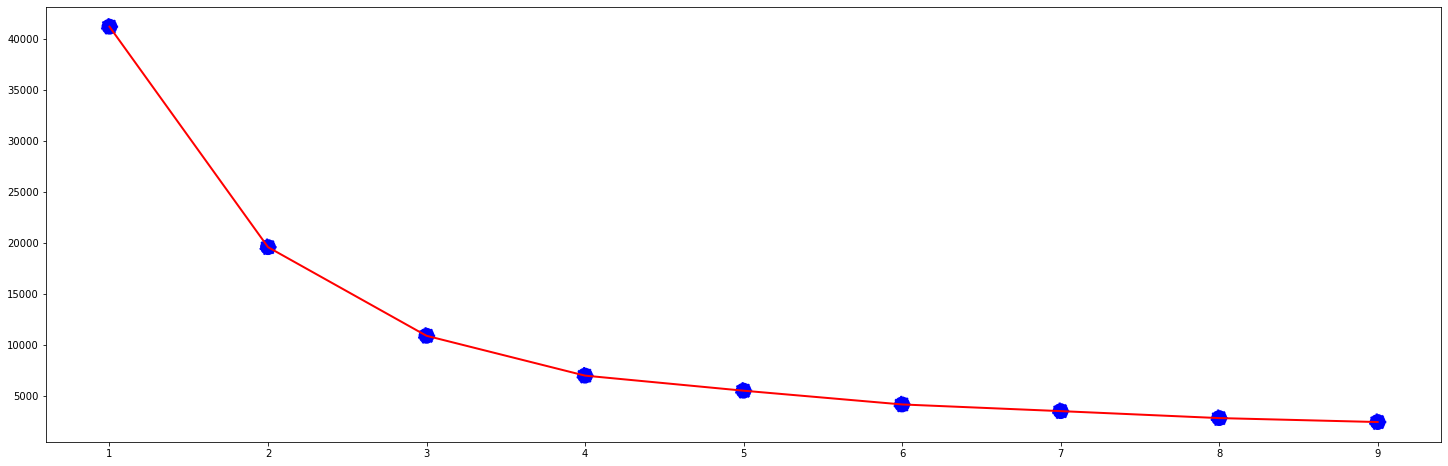

In [181]:
# elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std_pca.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(25, 8))

sns.lineplot(x=range(1, 10), y=inertia, color='red', linewidth = 2);
sns.scatterplot(x=range(1, 10), y=inertia, s=300, color='blue',  linestyle='--');

In [182]:
# 4 cluster
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_std_pca)

In [191]:
X_std_pca['cluster'] = kmeans.labels_
df_final['cluster'] = kmeans.labels_
X_std_pca

<ipython-input-191-a2bbd98bae59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = kmeans.labels_


,pc1,pc2,cluster
0,2.787747,0.020037,3
1,1.519474,-0.220257,0
2,0.945612,-0.326119,0
3,0.614595,-0.388255,0
4,3.561041,0.167949,3
...,...,...,...
11874,-1.263012,-0.746215,1
11875,-1.263012,-0.746215,1
11876,-1.224445,-0.732769,1
11877,-1.224445,-0.732769,1


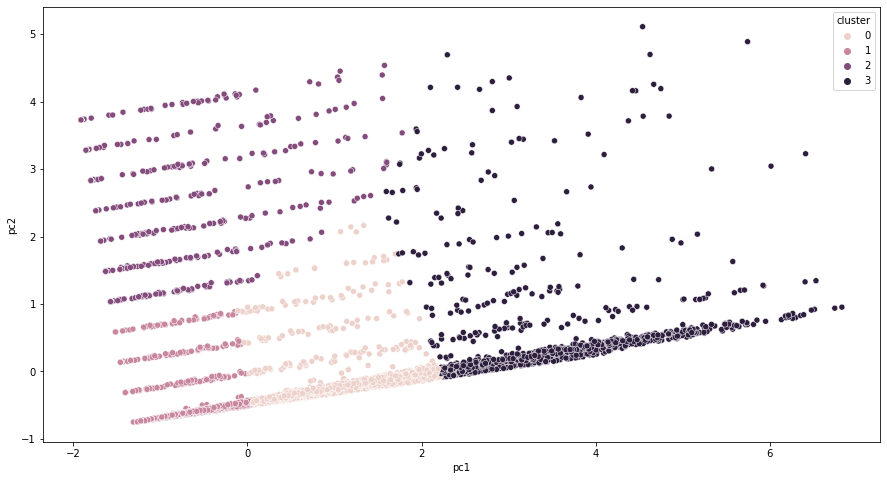

In [185]:
#visualization
plt.figure(figsize=(15,8))
sns.scatterplot(data=X_std_pca, x='pc1', y='pc2', hue='cluster')
plt.show()

In [188]:
#insight
display(df_final.groupby('cluster').agg(['mean', 'median']))

NA_Sales         EU_Sales         JP_Sales        Global_Sales       
             mean median      mean median      mean median         mean median
cluster                                                                       
0        0.167553   0.16  0.068564   0.06  0.001216   0.00     0.263185   0.25
1        0.039758   0.03  0.014612   0.01  0.004099   0.00     0.063866   0.05
2        0.021091   0.00  0.008551   0.00  0.064158   0.06     0.098089   0.07
3        0.338779   0.33  0.152020   0.16  0.004789   0.00     0.547456   0.53

culster 0: game sales in North America have 0.16 score are the most game sales compared to Europe and Japan game sales with a reference to Global_sales 0.25
culster 1: game sales in North America have 0.03 score are the most game sales compared to Europe and Japan game sales with a reference to Global_sales 0.05
culster 2: game sales in Japan have 0.03 score are the most game sales compared to Europe and North America game sales with a reference to Global_sales 0.07
culster 3: game sales in North America have 0.33 score are the most game sales compared to Europe and Japan game sales with a reference to Global_sales 0.53